## Loading Data

### Imports and Initial Setup

In [17]:
# Importing core libraries required for the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import warnings

# Setting max rows settings to 200 to display all the summary data
pd.set_option("display.max_rows", 50)

# Suppress warnings
warnings.filterwarnings('ignore')

### Load data from CSV

In [18]:
# Importing the loan.csv file
data_original = pd.read_csv('C:\\Users\\rajat\\Downloads\\git_upgrad\\lending_club_case_study\\loan.csv', header = 0)
data = data_original
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data Dictionary Review

In [19]:
# Loading data dictionary values
pd.set_option('display.max_colwidth', -1)
dict = pd.read_excel('C:\\Users\\rajat\\Downloads\\git_upgrad\\lending_club_case_study\\Data_Dictionary.xlsx')
dict.head(5)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [20]:
data.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std      7456.670694 
min      500.000000  
25%      5500.000000 
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

### Aim : To segregate favourable applicants for the lending process 

* The loan is already accepted in this dataset *

1) Loan amount requested -> what is the loan amount requested and what is the amount dispursable?
2) Previous history with loans -> does the applicant have a good credit score?
3) Current balance, salary -> is the applicant capable of paying back?

## Work with the data that is either completed the loan / hasn't

Useful columns ->
grade
sub_grade
int_rate
installment
emp_length
annual_inc
verification_status
open_acc -> total accounts open currently
total_rec_late_fee
pub_rec_bankruptcies
total_rec_late_fee
total_rec_prncp -> Total principle received till date
total_rec_int -> Total interest received till date



loan amt - requested amt
funded amt -> aprooved amt
funded amt inv -> actually paid amt to the borrower

In [21]:
data = data.drop(columns = ['id','member_id'])
data = data.drop_duplicates(keep = 'first')
data = data[data['loan_status'] != 'Current'] 
data2 = data

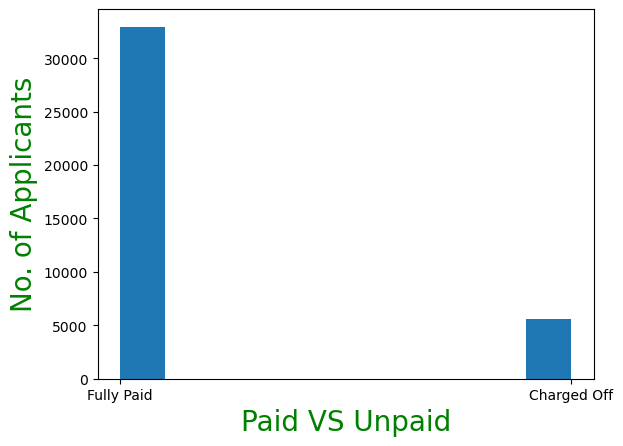

Percentage of Applicants who paid the amt: 85.41358840760039
Percentage of Applicants that defaulted: 14.586411592399616


In [22]:
plt.hist(data['loan_status'])
plt.xlabel('Paid VS Unpaid', size = 20, color = 'green')
plt.ylabel('No. of Applicants', size = 20, color = 'green')
plt.show()
total =len(data['loan_status'].index)
paid_percent = len(data[data['loan_status'] == 'Fully Paid'].index) *100 / total
unpaid_percent = len(data[data['loan_status'] == 'Charged Off'].index) *100 / total
print('Percentage of Applicants who paid the amt: ' + str(paid_percent) + '\nPercentage of Applicants that defaulted: ' + str(unpaid_percent))

# Attempting to find a trend / similarity between defaulters

In [23]:
data_1 = data[data['loan_status'] == 'Charged Off']
defa= data_1[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','open_acc','verification_status']]
print(defa.verification_status.value_counts()) # To know if the sources are verified

int_list = defa['int_rate'].apply(lambda x: float(x[:-1]))
Q1 = int_list.quantile(0.25)
mean = int_list.mean()
Q3 = int_list.quantile(0.75)
mode = int_list.mode()
print(Q1)
print(mean)
print(Q3)
print(mode)

Not Verified       2142
Verified           2051
Source Verified    1434
Name: verification_status, dtype: int64
11.309999999999999
13.820431846454595
16.4
0    11.49
1    13.49
Name: int_rate, dtype: float64


#### Above is an attempt to identify if most of the defaulters lie in the not verified category, it is false.

In [24]:
data_2 = data2[data2['loan_status'] == 'Fully Paid']

paid= data_2[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','open_acc','verification_status']]
print(paid.verification_status.value_counts()) # To know if the sources are verified

int_list_2 = paid['int_rate'].apply(lambda x: float(x[:-1]))
Q1 = int_list_2.quantile(0.25)
mean = int_list_2.mean()
Q3 = int_list_2.quantile(0.75)
mode = int_list_2.mode()
print(Q1)
print(mean)
print(Q3)
print(mode)

Not Verified       14552
Verified           10155
Source Verified    8243 
Name: verification_status, dtype: int64
8.49
11.60976115326252
13.99
0    10.99
Name: int_rate, dtype: float64


# Observations related to Verification Status and Interest rate

There is not much insight we can draw from the verification status apart from the point that a significant amount is lend to the applicants that are unverified.

It is observed that the interest rates vary in both the scenarios, the rates in case of defaulters is higher than that in case of those who paid the amnt.

Below is a box plot that depicts the same.

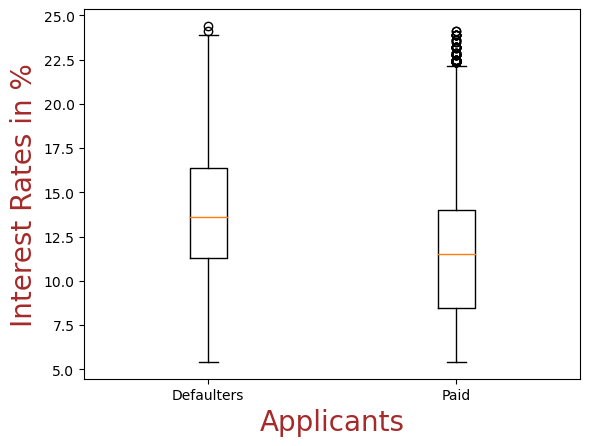

In [25]:
#plt.boxplot(int_list)
plt.boxplot([int_list,int_list_2])
plt.xticks((1,2),['Defaulters','Paid'])
plt.ylabel('Interest Rates in %', size = 20, color = 'brown')
plt.xlabel('Applicants', size = 20, color = 'brown')
plt.show()

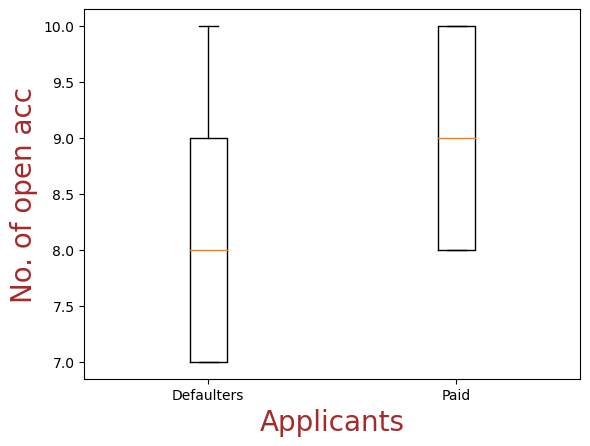

In [26]:
defa_1 = defa
paid_1 = paid

defa_1 = defa_1[(defa_1['open_acc'] > defa_1.open_acc.quantile(0.3)) & (defa_1['open_acc'] < defa_1.open_acc.quantile(0.7))]
paid_1 = paid_1[(paid_1['open_acc'] > paid_1.open_acc.quantile(0.3)) & (paid_1['open_acc'] < paid_1.open_acc.quantile(0.7))]
plt.boxplot([defa_1.open_acc,paid_1.open_acc])
plt.xticks((1,2),['Defaulters','Paid'])
plt.ylabel('No. of open acc', size = 20, color = 'brown')
plt.xlabel('Applicants', size = 20, color = 'brown')
plt.show()

The above analysis suspects a link between the number of open credit linnks of an applicant with the tendency to default.

count     32950
unique    50   
top       CA   
freq      5824 
Name: addr_state, dtype: object


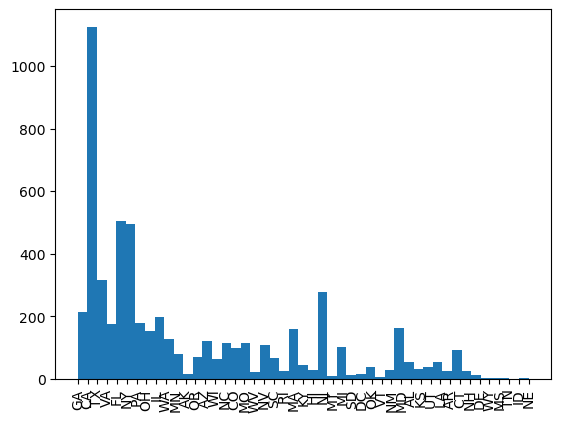

In [28]:
defa_state = data_1.addr_state

tot = len(defa_state.unique())
print(data_2.addr_state.describe())
plt.hist(defa_state, bins = tot)
plt.xticks(rotation = 90)
plt.show()

# Defaulters by Employment Exp

In [29]:

data_1.emp_length.value_counts()


data_2.emp_length.value_counts()

10+ years    7157
< 1 year     3869
2 years      3724
3 years      3457
4 years      2880
5 years      2736
1 year       2713
6 years      1861
7 years      1448
8 years      1232
9 years      1068
Name: emp_length, dtype: int64

Assuming that the employement age is 22 years

Here is the list of age groups the defaulters belong to:

22 - 27 -> 3137

27 - 31 -> 931

31+ -> 1331

But again most of the applicants lie in this age group

In [30]:
data_1.grade.value_counts()

B    1425
C    1347
D    1118
E    715 
A    602 
F    319 
G    101 
Name: grade, dtype: int64

Observation based off of the grades and defaulters.
Lets look into the grade A a bit deeper.

The reason for loan could've hepled predict of segregated into categories instead of these many unique values.

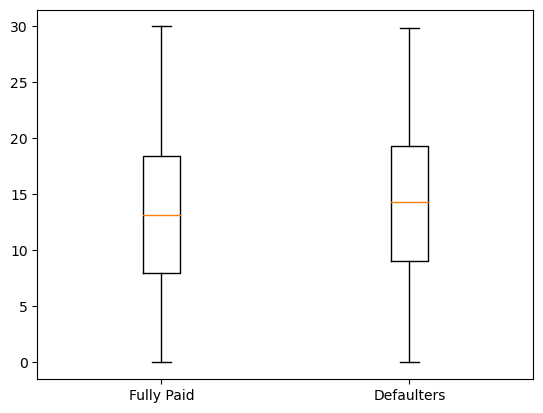

In [31]:
plt.boxplot([data_2.dti,data_1.dti])
plt.xticks((1,2),['Fully Paid','Defaulters'])
plt.show()

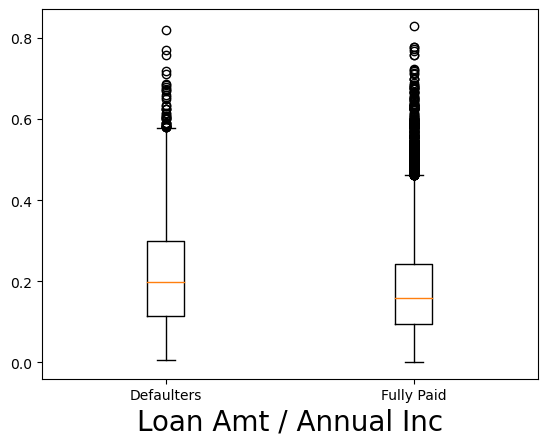

In [32]:
ratio_defa = data_1.loan_amnt / data_1.annual_inc
ratio_paid = data_2.loan_amnt / data_2.annual_inc

Q1d = ratio_defa.quantile(0.25)
Q3d = ratio_defa.quantile(0.75)
IQRd = Q3d - Q1d

Q1p = ratio_paid.quantile(0.25)
Q3p = ratio_paid.quantile(0.75)
IQRp = Q3p - Q1p


plt.boxplot([ratio_defa,ratio_paid])
plt.xticks((1,2),['Defaulters','Fully Paid'])
plt.xlabel('Applicants', size = 20)
plt.xlabel('Loan Amt / Annual Inc', size = 20)
plt.show()

Tried to filter the outliers, but I think a column with values between 0 - 1  is not where it is to be applied as I got null sets in both the formula based approach as well as the general outlier category (between 0.3 to 0.7, found this on google).

# Conclusion:

The applicants whose loan amount to annual income ratio is high tend to default. This may act as an influencing factor in the prediction model as even along with the outliers Fully Paid category has a significantly lower ratio.

# Final Views:
 
The analysis focused on both univariate and bivariate analysis for all the columns we found usefull / seriously influential.

Here are a few factors that can act as an indicator / influential variables for the prediction models:
1) Interest Rates (Not sure if this applicable since investor imposes this, or maybe he senses the risk and imposes the higher rates)
2) Loan Amount to Annual Income Ratio
3) Grades and Sub Grades
4) Number of open Accounts

Note : Did not analyse dti in this sheet cause found out from google that anything below 35% is good and almost all the results are below it.